## FINAL PROJECT PROPOSAL

**Group Memeber : Abdellah Ait Elmouden, Habib Khan, Priya Shaji, Vijaya Cherukuri**

### Introduction

Social  networks  are  the  main  resources  to  gather information   about   people’s   opinion   and   sentiments   towards different  topics  as  they  spend  hours  daily  on social  mediasand share   their   opinion. In   this   project   we   show   the application of sentimental analysis and how to connect to Twitter and  run  sentimental  analysis  queries, based on News Topics during COVID-19.

### Motivation

Six months since the first COVID-19 case in the United States, and 113+ days into the earliest Lockdown Order of New York City, now the city reopen the time some other states see coronavirus cases rise. how have people been feeling through this special time? Do we know how others are responding to the pandemic? The Corona Virus endangers our physical health indeed, but alongside, social distancing also poses a threat to our emotional stability. Thus, it is crucial to understand public sentiments under COVID-19. To analyze these we'll use Sentiment Analysis on tweets to aid the understanding of sentiment trends.

### Data Source

We will be using the Twitter API, as our tool to collect dtat for this analysis. Twitter is a gold mine of data. Unlike other social platforms, almost every user’s tweets are completely public and pullable. This is a huge plus if you’re trying to get a large amount of data to run analytics on.

![alt text](twitter.png)

#### Importing the Required Libraries

In [151]:
import pandas as pd
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [152]:
consumer_key='lub2vXiqJXY5JVYTtxaQWvshE'
consumer_secret='o4tRCRf1YWo1WdrQzx1xNhuSvOIshguPZNx86U9UVCaNzsLPEF'
access_token='165276006-rCCM1Nt4txkpxMa01RJLUuq7WrF9sREqxHFApiUm'
access_token_secret='lf2SmfrfrIBd2aiYmq24oPfXVlZSLBamJDEMjM5eHtvkE'

In [153]:
auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('coronavirus stimulus')

#####################################################################################

I suggest to remove the graphs and other part for now. we can only show a sample of dataframe

#####################################################################################

In [1]:
search_term = "#coronavirus+stimulus -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-04-01').items(1000)

NameError: name 'tweepy' is not defined

In [155]:
#convert twitter data into a dataframe
json_data = [r._json for r in tweets]
df = pd.io.json.json_normalize(json_data)

In [156]:

df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Sat Jul 11 22:15:21 +0000 2020,1282076036520390657,1282076036520390657,@POTUS / @realDonaldTrump ‘s EGO has murdered ...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,8.222157e+17,822215679726100480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Jul 11 21:54:40 +0000 2020,1282070829333970945,1282070829333970945,"The #coronavirus #stimulus, if divided equally...",True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Jul 11 21:47:51 +0000 2020,1282069115499417600,1282069115499417600,Uncle Sam wants you! To report stimulus fraud ...,False,"<a href=""https://nectar.social"" rel=""nofollow""...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat Jul 11 21:16:05 +0000 2020,1282061120367464448,1282061120367464448,A Second Stimulus Check — Congress Has No Choi...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 11 18:47:00 +0000 2020,1282023604356624385,1282023604356624385,People are scared of catching #coronavirus cor...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df1 = df[['text']]

In [158]:
remove_words = ['second', 'first', 'check', 'stimulus','https', 'stimulus', 'stimuluscheck', 'few','co', 'http']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df1['new'] = df1['text'].str.replace(pat, '')

In [159]:

df1['SID_Sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in df1['text']]
df1['TextBlob_Sentiment'] = [TextBlob(tweet).sentiment[0] for tweet in df1['text']]

In [160]:
df1.head()

,text,new,SID_Sentiment,TextBlob_Sentiment
0,@POTUS / @realDonaldTrump ‘s EGO has murdered ...,@POTUS / @realDonaldTrump ‘s EGO has murdered ...,-0.6597,0.00
1,"The #coronavirus #stimulus, if divided equally...","The #coronavirus #, if divided equally, could ...",0.0000,0.00
2,Uncle Sam wants you! To report stimulus fraud ...,Uncle Sam wants you! To report fraud #bailout...,-0.6239,0.25
3,A Second Stimulus Check — Congress Has No Choi...,A Second Stimulus Check — Congress Has No Choi...,-0.2960,0.00
4,People are scared of catching #coronavirus cor...,People are scared of catching #coronavirus cor...,-0.7430,0.60


Text(0, 0.5, 'Density')

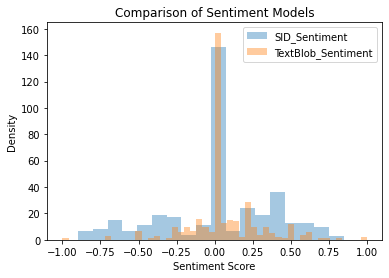

In [161]:
df = df1[df1.SID_Sentiment == 'SID_Sentiment']
sns.distplot(df1['SID_Sentiment'],  kde=False, label='SID_Sentiment')

df =df1[df1.TextBlob_Sentiment == 'TextBlob_Sentiment']
sns.distplot(df1['TextBlob_Sentiment'],  kde=False,label='TextBlob_Sentiment')

plt.legend(prop={'size': 10})
plt.title('Comparison of Sentiment Models')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

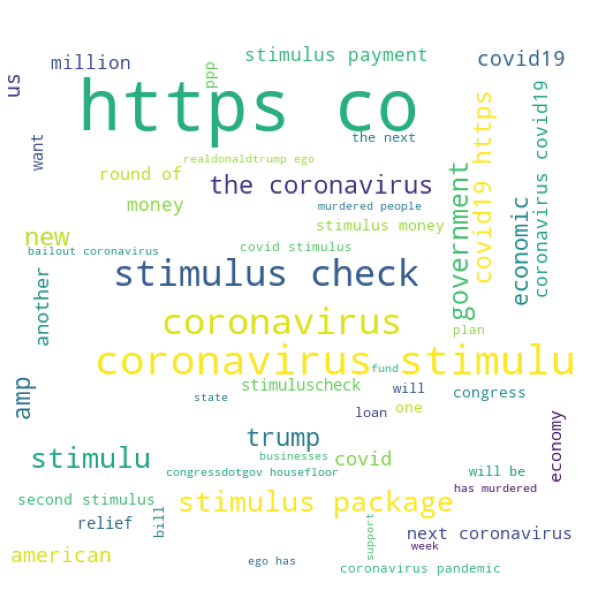

In [162]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for w in df1.text: 
      
    w = str(w) 
    tokens = w.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
        
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [163]:
import networkx as nx
graph_eng=nx.DiGraph()

# create Nodes
G = nx.Graph()

In [164]:
username = "stimuluscheck"
followers = []
followers.extend(api.followers(screen_name=username))

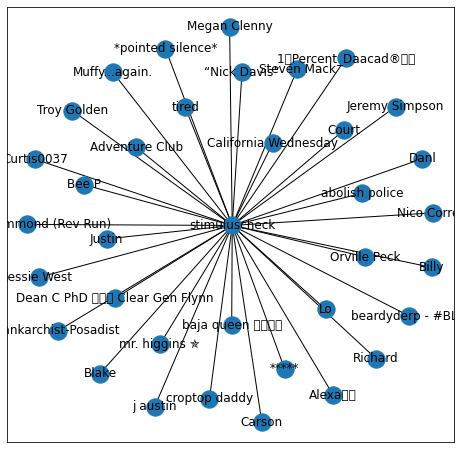

In [165]:
friends = []
friends.extend(api.friends(screen_name=username))

for user in followers:
    G.add_edge(user.name,username)
for user in friends:
    G.add_edge(username,user.name)

plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.show()